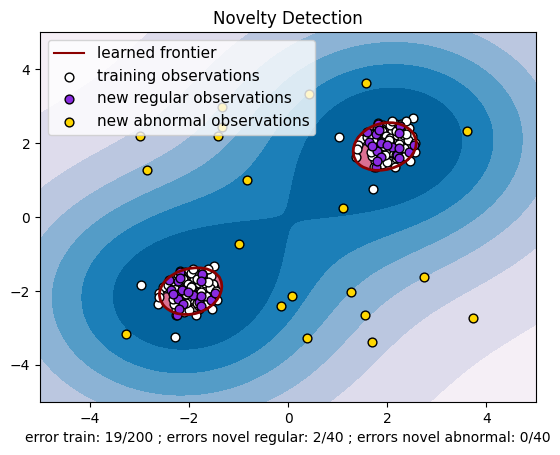

In [1]:
import numpy as np
from sklearn import svm

# 훈련 데이터 생성
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# 정상적인 새로운 관측값 생성
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# 비정상적인 새로운 관측값 생성
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# 모델 학습
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

import matplotlib.font_manager
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay

_, ax = plt.subplots()

# 결정 경계 표시를 위한 그리드 생성
xx, yy = np.meshgrid(np.linspace(-5, 5, 10), np.linspace(-5, 5, 10))
X = np.concatenate([xx.reshape(-1, 1), yy.reshape(-1, 1)], axis=1)
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="decision_function",
    plot_method="contourf",
    ax=ax,
    cmap="PuBu",
)
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="decision_function",
    plot_method="contourf",
    ax=ax,
    levels=[0, 10000],
    colors="palevioletred",
)
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="decision_function",
    plot_method="contour",
    ax=ax,
    levels=[0],
    colors="darkred",
    linewidths=2,
)

s = 40
b1 = ax.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k")
b2 = ax.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k")
c = ax.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", s=s, edgecolors="k")
plt.legend(
    [mlines.Line2D([], [], color="darkred"), b1, b2, c],
    [
        "learned frontier",
        "training observations",
        "new regular observations",
        "new abnormal observations",
    ],
    loc="upper left",
    prop=matplotlib.font_manager.FontProperties(size=11),
)
ax.set(
    xlabel=(
        f"error train: {n_error_train}/200 ; errors novel regular: {n_error_test}/40 ;"
        f" errors novel abnormal: {n_error_outliers}/40"
    ),
    title="Novelty Detection",
    xlim=(-5, 5),
    ylim=(-5, 5),
)
plt.show()